In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from skimage import feature, filters, util
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage.exposure import rescale_intensity, adjust_gamma, adjust_log
from skimage.transform import rotate

In [2]:
def imShows(Images, Labels = None, rows = 1, cols = 1):
    imagesArray = list(Images)
    labelsArray = [f"Image {i + 1}" for i in range(len(imagesArray))] if Labels is None else list(Labels)
    figsize = (20, 20) if ((rows == 1) and (cols == 1)) else (cols * 8, rows * 5)
    fig = plt.figure(figsize = figsize)
    for i in range(1, rows * cols + 1):
        ax = fig.add_subplot(rows, cols, i)
        image = imagesArray[i - 1]
        cmap = plt.cm.gray if (len(image.shape) < 3) else None
        ax.imshow(image, cmap = cmap)
        ax.set(title = labelsArray[i - 1], xticks = [], yticks = [])
    plt.show()

def showThreeImages(IM1, IM2, IM3):
    imShows([IM1, IM2, IM3], rows = 1, cols = 3)
def showTwoImages(IM1, IM2):
    imShows([IM1, IM2], rows = 1, cols = 2)
def showOneImage(IM1):
    imShows([IM1])
def showListImages(listImage, rows, cols):
    imShows(listImage, rows = rows, cols = cols)

# Bài tập 01

# Viết thành một function cho biết thông tin của bức ảnh : Ảnh màu hay ảnh xám và giá trị min, max tương ứng với từng kênh màu

In [3]:
def imageInfo(img):
    width, height = img.shape[:2]
    channel = len(img.shape)
    print(f'>> Width= {width}, Height = {height}, Channel = {channel}')
    if channel == 2:
        minVal, maxVal = np.min(img), np.max(img)
        print(f'>> Min intensity = {minVal}, Max intensity = {maxVal}')
    else:
        colors = ['Red', 'Green', 'Blue']
        for channel, color in enumerate(colors):
            minVal = np.min(img[:, :, channel])
            maxVal = np.max(img[:, :, channel])
            print(f'>> {color}: Min intensity = {minVal}, Max intensity = {maxVal}')

In [4]:
image_color = plt.imread('rose.jpg')
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

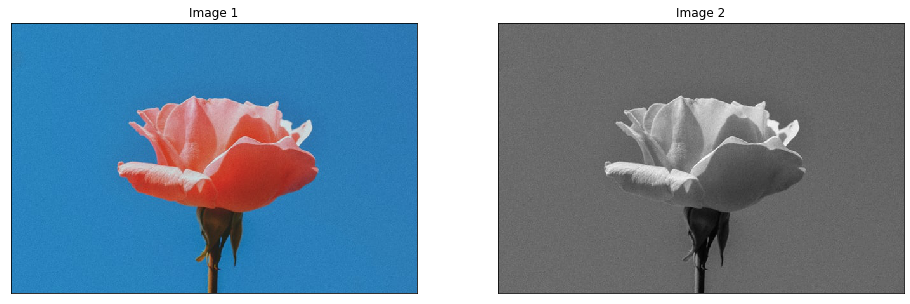

In [5]:
showTwoImages(image_color, image_gray)

In [6]:
imageInfo(image_color)

>> Width= 427, Height = 640, Channel = 3
>> Red: Min intensity = 6, Max intensity = 243
>> Green: Min intensity = 22, Max intensity = 230
>> Blue: Min intensity = 0, Max intensity = 255


In [7]:
imageInfo(image_gray)

>> Width= 427, Height = 640, Channel = 2
>> Min intensity = 25, Max intensity = 230


In [8]:
def convertToBitArray(img):
    rows, cols = img.shape
    bitArray = []
    for i in range(rows):
        for j in range(cols):
            bitArray.append(np.binary_repr(img[i,j], width = 8))
    return bitArray

def bitPlane(bitImgVal, img1D):
    bitList = [int(i[bitImgVal]) for i in img1D]
    return bitList

def getBitImage(index, image2D):
    ImageIn1D = convertToBitArray(image2D)
    Imagebit = np.array(bitPlane(index, ImageIn1D)).reshape(image2D.shape)
    return Imagebit

def getAllBitImage(image2D):
    image2D_Bit = list()
    for i in range(8):
        image2D_Bit.append(getBitImage(i, image2D))
    return image2D_Bit

def getAllBitColorImage(image, channels):
    bitImages = {}
    for index, channel in enumerate(channels):
        print(f'>> Channel: {channel}')
        bitImage = getAllBitImage(image[:, :, index])
        bitImages[channel] = bitImage
        showListImages(bitImage, rows = 2, cols = 4)
    return bitImages

# Hiển thị 24 bức ảnh theo bit của từng kênh màu R, G, B

>> Channel: R


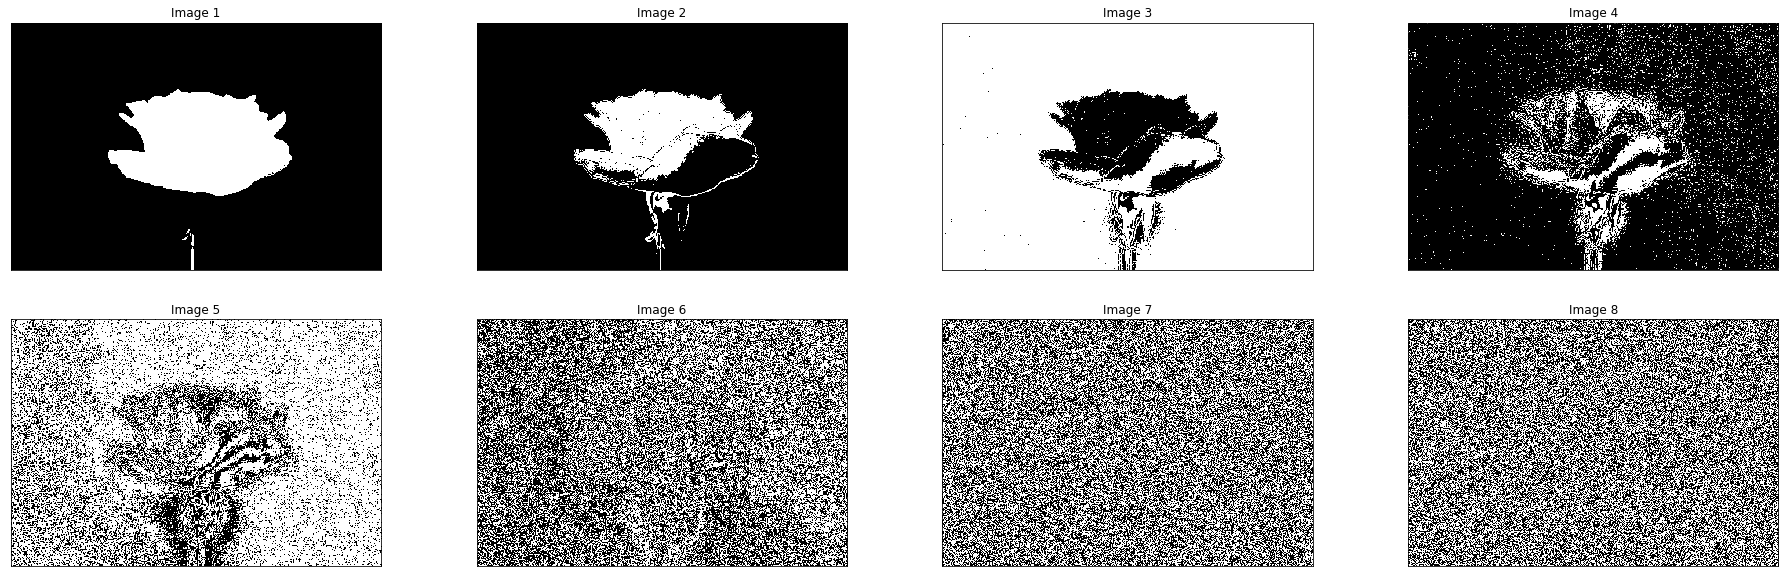

>> Channel: G


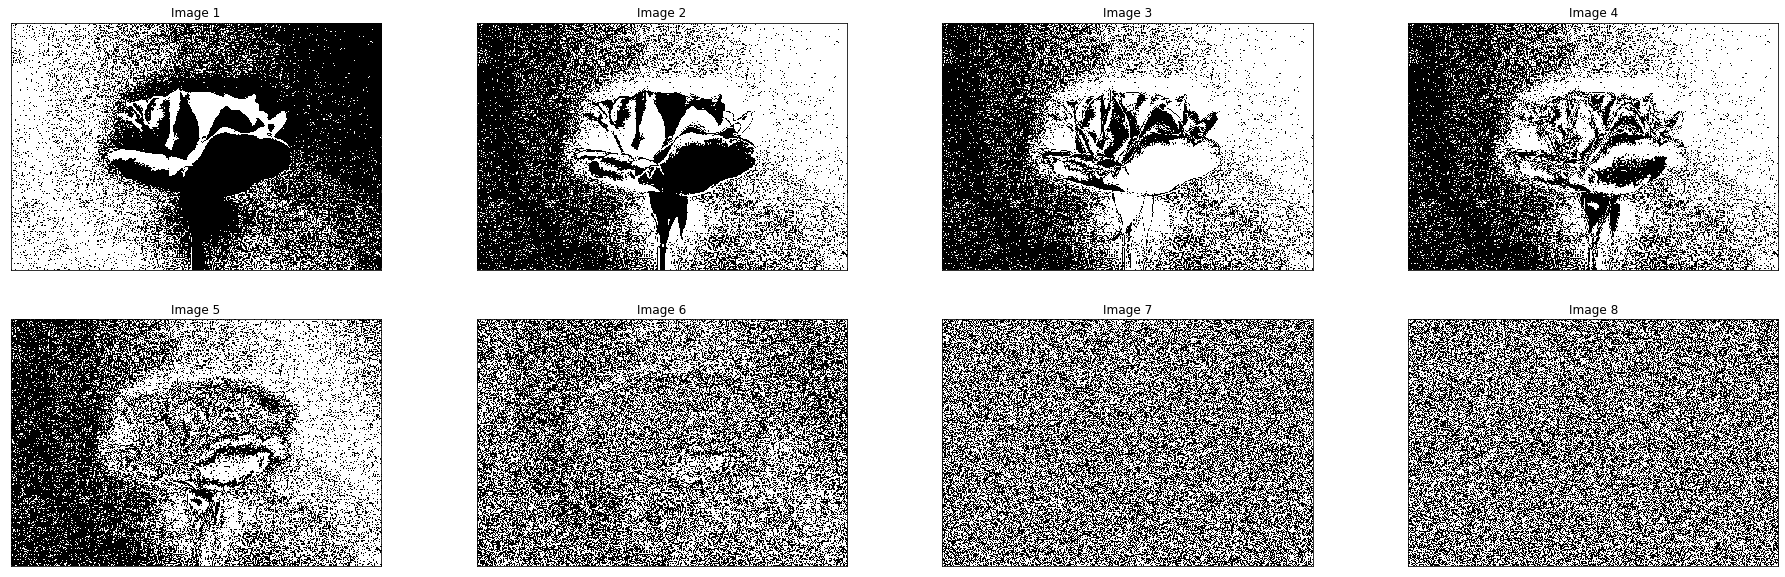

>> Channel: B


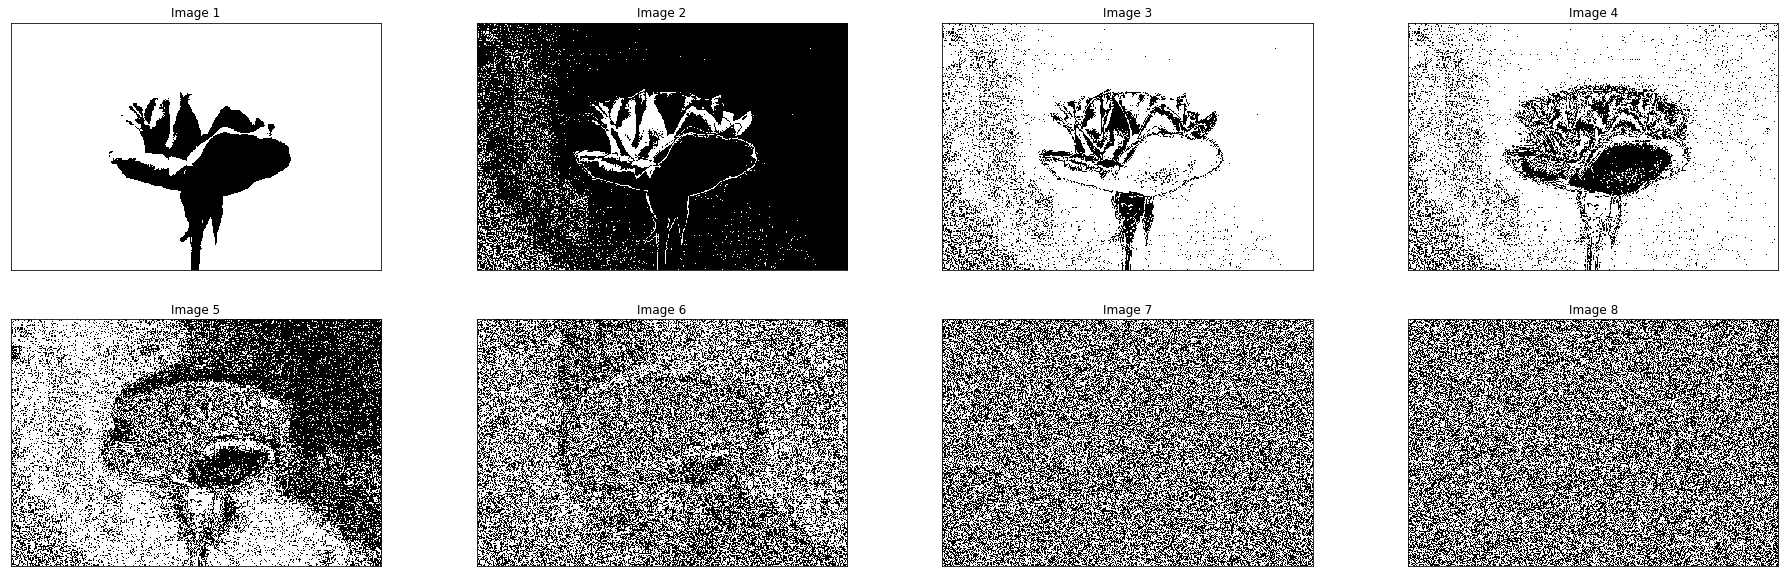

In [9]:
channels = ['R', 'G', 'B']
RGB_bitImage = getAllBitColorImage(image_color, channels)

# Hiển thị 24 bức ảnh theo bit của từng kênh màu H,S,V

>> Channel: H


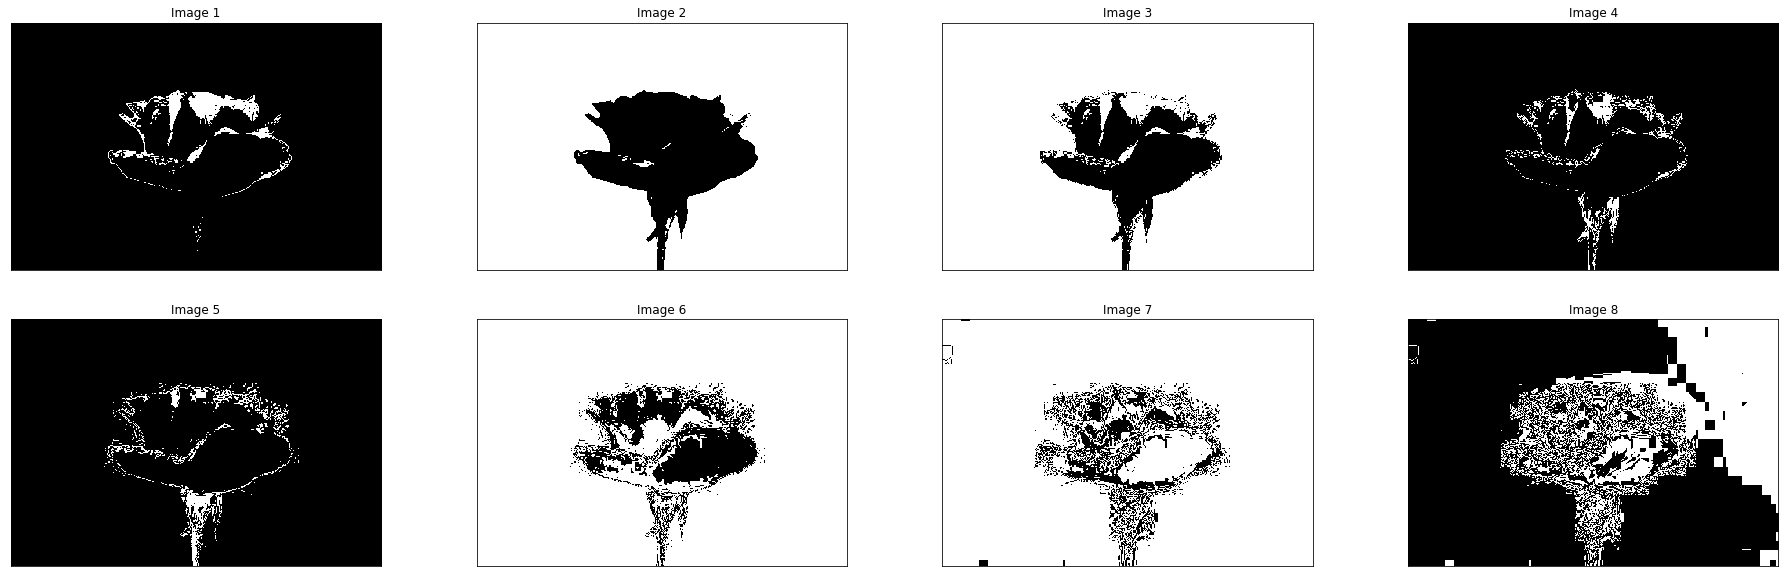

>> Channel: S


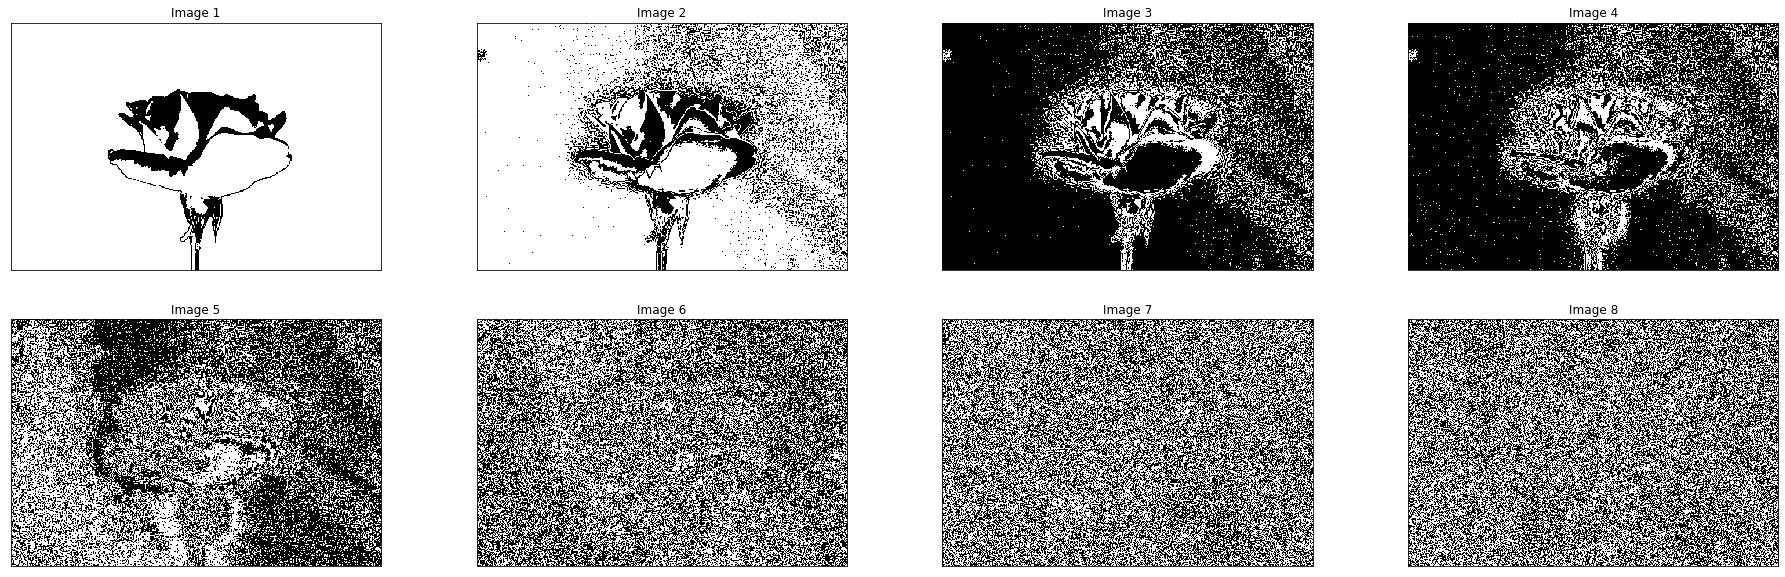

>> Channel: V


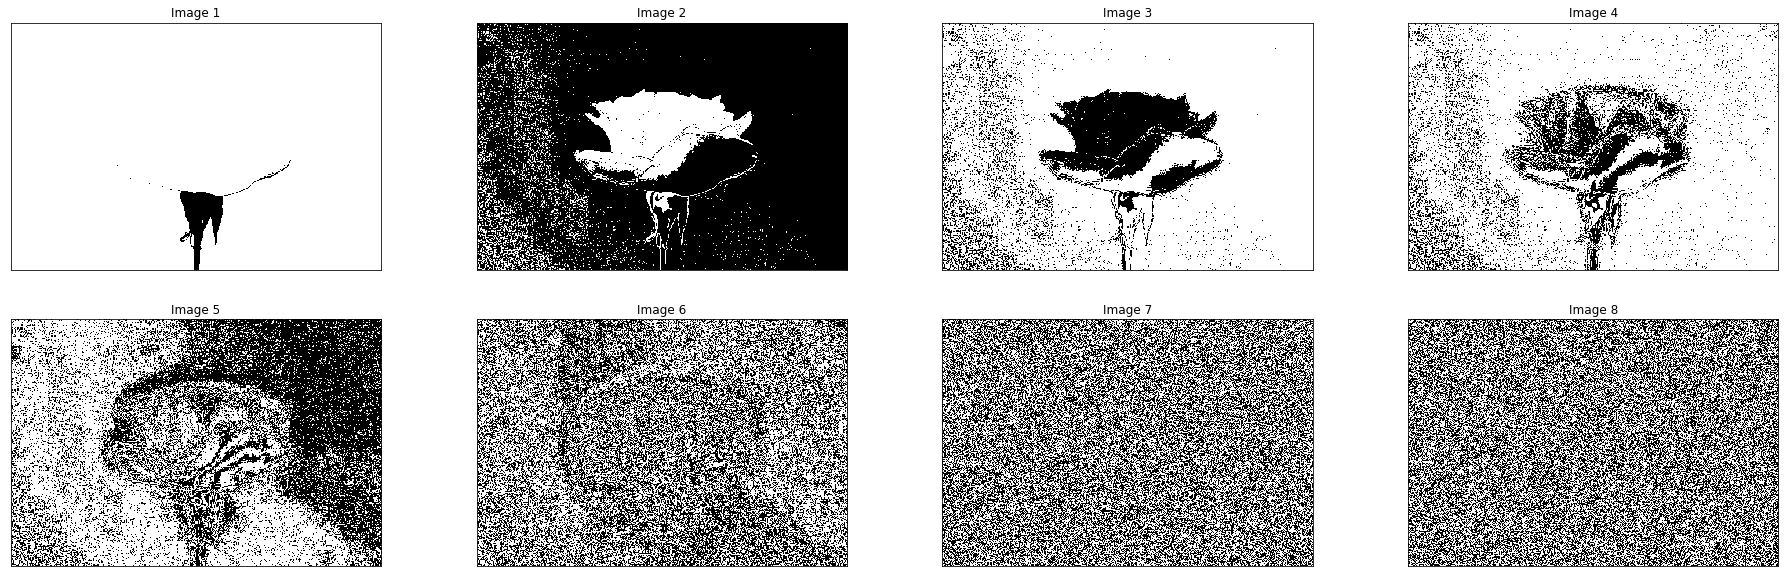

In [10]:
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_RGB2HSV)
channels = ['H', 'S', 'V']
HSV_bitImage = getAllBitColorImage(image_hsv, channels)

In [11]:
def SegmentColorImageByMask(IM, Mask):
    Mask = Mask.astype(np.uint8)
    result = cv2.bitwise_and(IM, IM, mask = Mask)
    return result

# Cho biết trong 24 ảnh bit theo kênh R, G, B có ảnh nào có thể dùng để trích xuất đối tượng hay không. Nếu có thì hiển thị ảnh bit đó ra

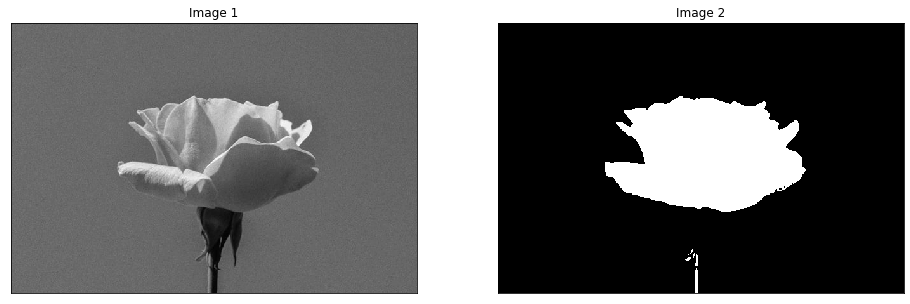

In [12]:
bitMask01 = RGB_bitImage['R'][0]
showTwoImages(image_gray, bitMask01)

# Cho biết trong 24 ảnh bit theo kênh H, S, V có ảnh nào có thể dùng để trích xuất đối tượng hay không. Nếu có thì hiển thị ảnh bit đó ra

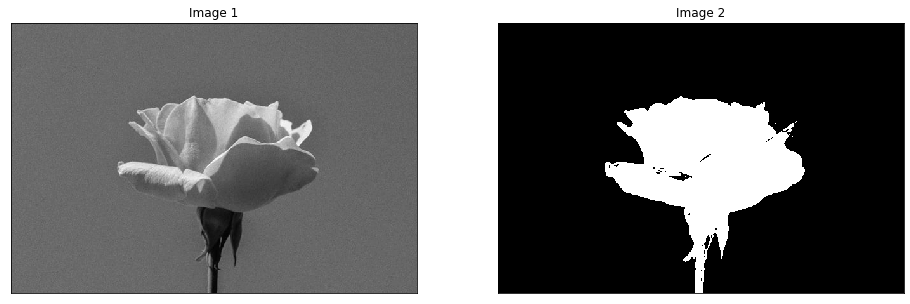

In [13]:
bitMask02 = 1 - HSV_bitImage['H'][1]
showTwoImages(image_gray, bitMask02)

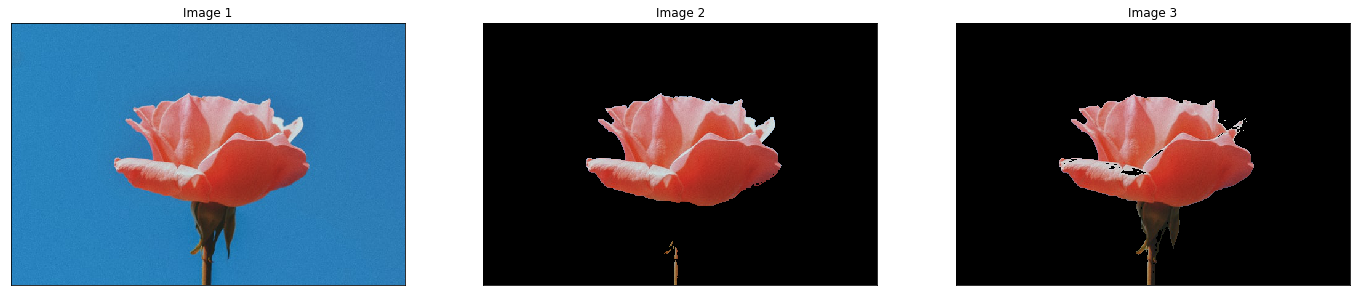

In [14]:
mask01_RGB = SegmentColorImageByMask(image_color, bitMask01)
mask02_RGB = SegmentColorImageByMask(image_color, bitMask02)
showThreeImages(image_color, mask01_RGB, mask02_RGB)

# Bài tập 02

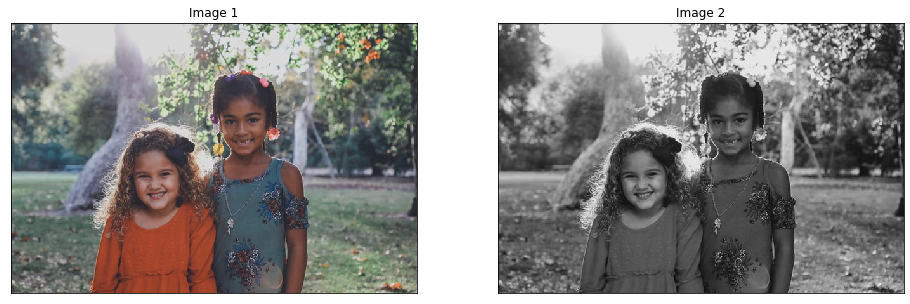

In [15]:
image_color = plt.imread('faces.jpg')
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
showTwoImages(image_color, image_gray)

# Viết 1 function input ảnh màu và xuất ảnh chân dung xám và chân dùng màu của ảnh đó 

In [16]:
@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)

def getPortrait(img_color):
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
    edges_gray = filters.sobel(image_gray)
    edges_color = sobel_each(img_color)
    return (1 - edges_gray), rescale_intensity(1 - edges_color)

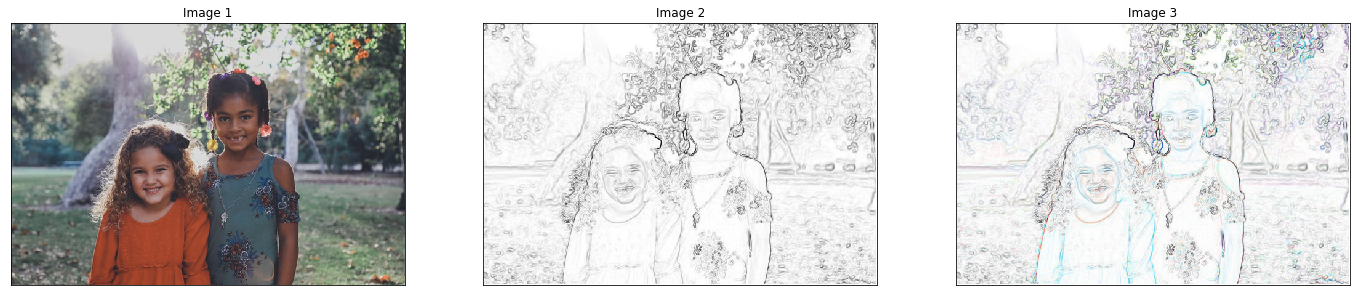

In [17]:
portraitGray, portraitColor = getPortrait(image_color)
showThreeImages(image_color, portraitGray, portraitColor)

# Tìm chọn range màu lower và upper để trích xuất được các khuôn mặt trong ảnh màu

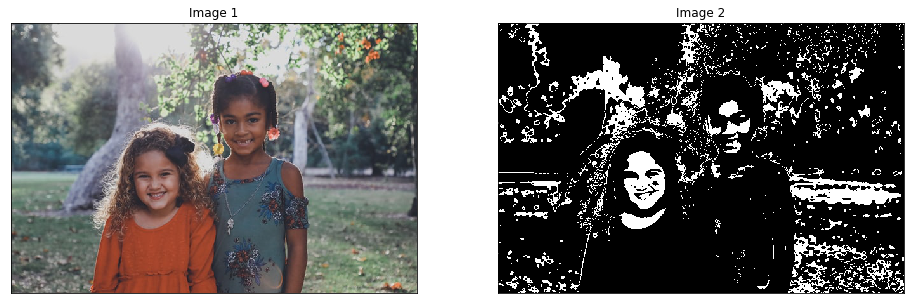

In [18]:
lower = np.array([127,79,72])
upper = np.array([183, 158, 164])
mask_face = cv2.inRange(image_color, lower, upper)
showTwoImages(image_color, mask_face)

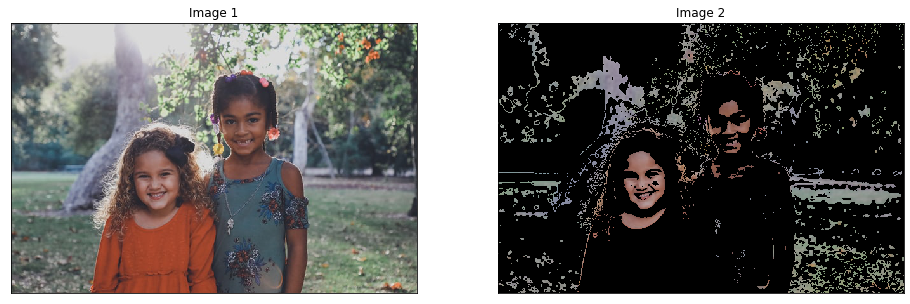

In [19]:
mask_rgb = SegmentColorImageByMask(image_color, mask_face)
showTwoImages(image_color, mask_rgb)

# Bài tập 03

In [20]:
def rotateImage(img, angle, resize = False):
    return rotate(img, angle, resize = resize)

def flipImage(img, how = 'vertical'):
    if how not in ['vertical', 'horizontal', 'both']:
        raise ValueError(' `how` parameter must be either `vertical`, `horizontal` or `both`')
    if how == 'vertical':
        return img[::-1, :]
    elif how == 'horizontal':
        return img[:, ::-1]
    else:
        return rotateImage(img, 180)

def getInversionImage(img):
    return util.invert(img)

def getInversionImage_func(img, max_values = [255, 255, 255]):
    result_img = img.copy()
    for channel, max_value in enumerate(max_values):
        result_img[:, :, channel] = max_value - result_img[:, :, channel]
    return result_img

def enhanceContrast(img, v_min = None, v_max = None):
    if v_min is None:
        v_min = np.percentile(img, 5)
    if v_max is None:
        v_max = np.percentile(img, 95)
    return rescale_intensity(img, in_range = (v_min, v_max))

def adjustGamma(img, gamma = None, gain = None):
    if gamma is None:
        gamma = 1
    if gain is None:
        gain = 1
    return adjust_gamma(img, gamma, gain)

def adjustGamma_func(img, gamma = None, gain = None):
    if gamma is None:
        gamma = 1
    if gain is None:
        gain = 1
    return gain * ((img/255)**gamma)

def adjustLog(img, gain = None):
    if gain is None:
        gain = 1
    return adjust_log(img, gain)

def adjustLog_func(img, gain = None):
    if gain is None:
        gain = 1
    return gain * np.log2(1 + img/255)

In [21]:
image_color = plt.imread('flower.jpg')
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Xuất ảnh xoay các góc 30,45,60 độ

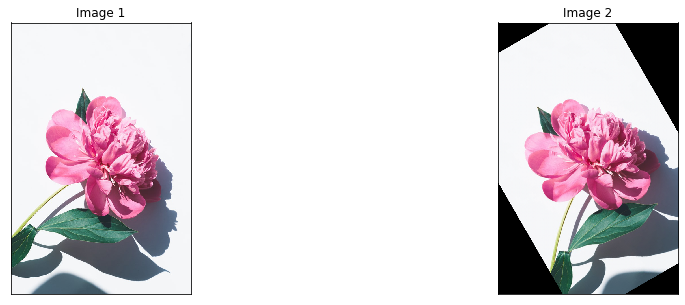

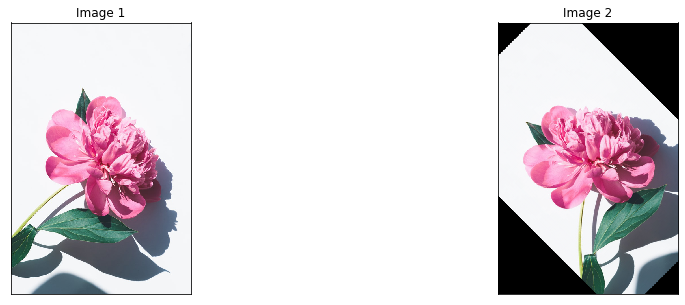

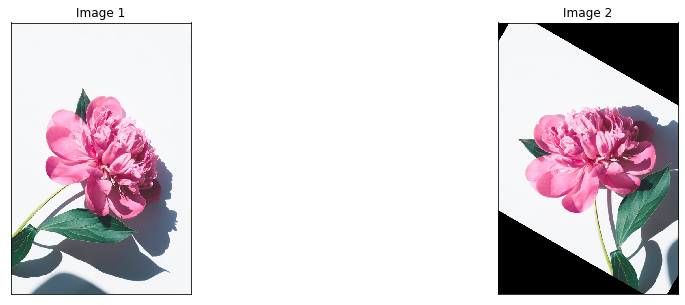

In [22]:
angles = [30, 45, 60]
for angle in angles:
    rotatedImage = rotateImage(image_color, angle)
    showTwoImages(image_color, rotatedImage)

# Xuất ảnh đối xứng qua trục hoành và trục tung đi qua tâm ảnh

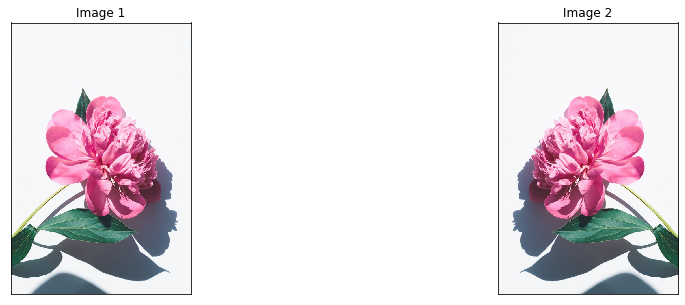

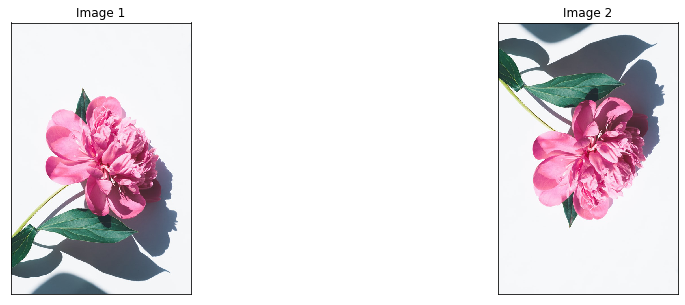

In [23]:
flips = ['horizontal', 'vertical']
for flip in flips:
    flippedImage = flipImage(image_color, how = flip)
    showTwoImages(image_color, flippedImage)

# Xuất ảnh inversion

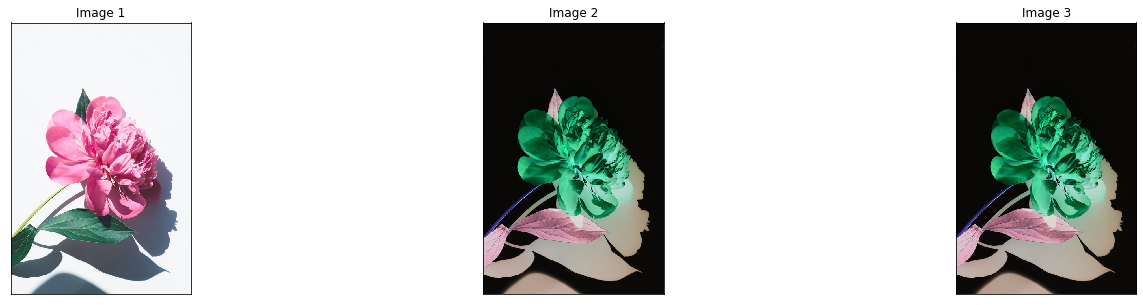

In [24]:
invertedImage = getInversionImage(image_color)
invertedImage_func = getInversionImage_func(image_color)
showThreeImages(image_color, invertedImage, invertedImage_func)

# Xuất ảnh enhance contrast

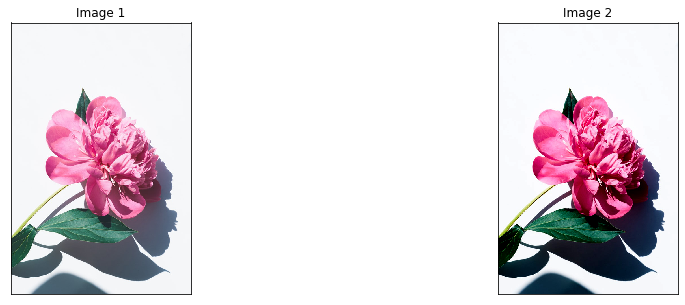

In [25]:
contrastImg = enhanceContrast(image_color)
showTwoImages(image_color, contrastImg)

# Xuất ảnh gamma và log enhancement

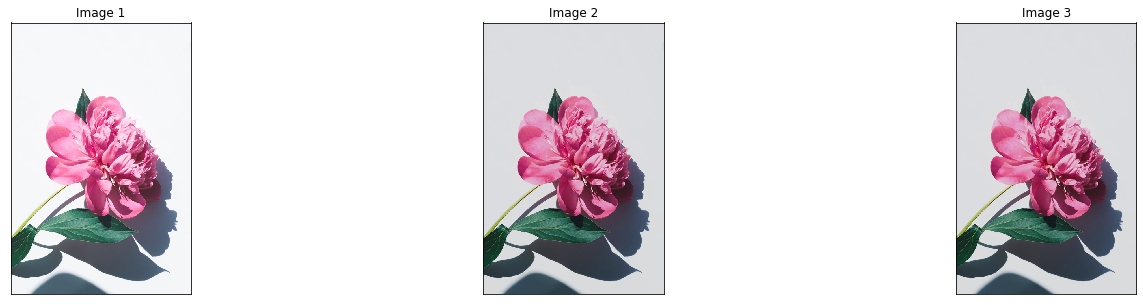

In [26]:
gammaAdjusted = adjustGamma(image_color, gamma = 1.2, gain = 0.9)
gammaAdjusted_func = adjustGamma_func(image_color, gamma = 1.2, gain = 0.9)
showThreeImages(image_color, gammaAdjusted, gammaAdjusted_func)

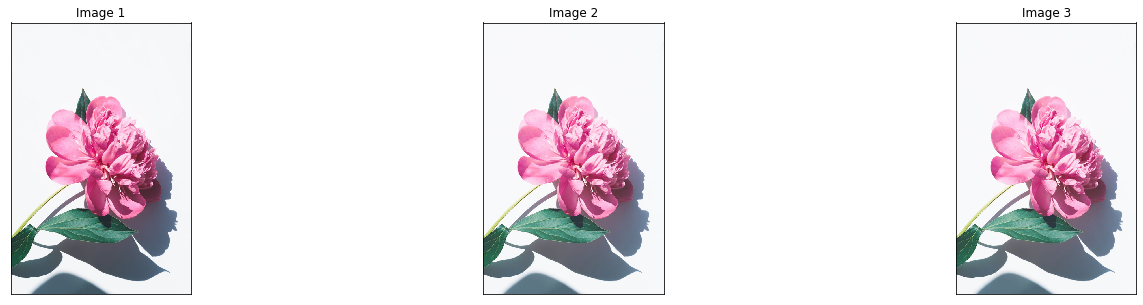

In [27]:
logAdjust = adjustLog(image_color, gain = 1)
logAdjust_func = adjustLog_func(image_color, gain = 1)
showThreeImages(image_color, logAdjust, logAdjust_func)